# CSME2 Bonus Point Assignment 1

<div style="text-align: right;font-size: 0.8em">Document Version 1.0.0, released 01/12/2021</div>
For detailed task instructions, please refer to the assignment PDF.

DO NOT CLEAR THE OUTPUT of the notebook you are submitting!

In [21]:
# Add any additional import you need in this cell
import numpy as np
from sklearn.cluster import kmeans_plusplus, KMeans
import os
from scipy.io import loadmat
import math

from random import seed
from random import random
from numpy.random import default_rng
import pandas as pd
import matplotlib.pyplot as plot

np.random.seed(1234)

### Setup
__Task A.1__ Load the data into the following numpy arrays. For the output, only use the first torque variable.
Randomly split the data from the file ```sarcos_inv.mat``` into a training set (80%) and a validation set (20%).

In [2]:
path = os.getcwd()

data = loadmat(path + '/data/sarcos_inv.mat')
test_data = loadmat(path + '/data/sarcos_inv_test.mat')

data_array = data['sarcos_inv']
test_data_array = test_data['sarcos_inv_test']



In [972]:
# Randomly splits the data into train and validation data
def split_data(array, percentage_train): # percentage_train defined as float
    np.random.shuffle(array)
    train, validation = array[:math.floor(array.shape[0] * percentage_train) ,:], array[math.floor(array.shape[0] * percentage_train):,:]
    return train, validation

In [973]:
# Input and output training data
train, validation = split_data(data_array, 0.8)

input_data = data_array[:, :21]
output_data = data_array[:, 21:22]

xs_train = train[:, :21]
ys_train = train[:, 21:22]

# Input and output validation data
xs_valid = validation[:, :21]
ys_valid = validation[:, 21:22]

# Input and output test data
xs_test = test_data_array[:, :21]
ys_test = test_data_array[:, 21:22]

In [974]:
# Check for yourself 
# The following should lead to output 
# (44484, 21)
# (44484, 1)
# (8897, 21)
# (8897, 1)
# (4449, 21)
# (4449, 1)
print(xs_train.shape)
print(ys_train.shape)
print(xs_valid.shape)
print(ys_valid.shape)
print(xs_test.shape)
print(ys_test.shape)

(35587, 21)
(35587, 1)
(8897, 21)
(8897, 1)
(4449, 21)
(4449, 1)


__Task A.2__ Standardize the data such that
1. Training inputs have mean 0
2. Each training input variable has variance 1
3. The training outputs have mean 0
4. Apply the same transformation to the validation and test data

Implement this manually, i.e., do not use a ready scaler like the one provided by scikit-learn.

In [975]:
# Calculate the mean and std of the training data
input_mean = np.mean(xs_train, axis=0)
input_std = np.std(xs_train, axis=0)
output_mean = np.mean(ys_train, axis=0)

# Store the standardized data in the following variables
xs_train_std = (xs_train - input_mean) / input_std
ys_train_std = ys_train - output_mean

print(xs_train.shape)

xs_valid_std = (xs_valid - input_mean) / input_std
ys_valid_std = ys_valid - output_mean

xs_test_std = (xs_test - input_mean) / input_std
ys_test_std = ys_test - output_mean
xs_test_std.ndim

(35587, 21)


2

In [976]:
# Check for yourself
# The following should lead to (roughly) six zeros and three arrays with (approximately) ones
print(np.mean(xs_train_std))
print(np.mean(ys_train_std))
print(np.mean(xs_valid_std))
print(np.mean(ys_valid_std))
print(np.mean(xs_test_std))
print(np.mean(ys_test_std))

print(np.var(xs_train_std, axis=0))
print(np.var(xs_valid_std, axis=0))
print(np.var(xs_test_std, axis=0))

1.7988736604700613e-17
1.0829751872208343e-15
-0.0031732117530427063
0.1987224037964787
-0.0015470586122085716
0.07801142839810273
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99941944 0.99560469 0.99031795 1.00475838 0.98202453 0.99057856
 0.98962848 1.04329953 0.98648227 1.01507856 1.01233076 0.97888543
 0.99605626 1.01274888 1.04355923 1.0075977  1.01756782 1.00041788
 0.9999016  1.01836687 1.01063379]
[0.9998744  0.99869108 0.99799683 0.99987941 0.99726481 0.99929238
 0.99628287 1.01155323 1.00516321 1.00175004 1.00261741 0.99621362
 0.99665721 1.00328967 1.00272614 0.98505808 1.02386997 1.00787492
 1.0053608  1.00520189 1.00324081]


__Task A.3__

In [977]:
# Task A.3.a
# Implement a function estimating the variance
def my_variance(xs):
    """Calculate the empirical variance of a given vector of scalars
    
    Arguments
    xs      1d numpy array
    
    Returns
    The empirical variance of the provided vector
    """
    mean = np.sum(xs)/xs.shape[0]
    variance = np.sum((xs-mean)**2)/xs.shape[0]
    return variance


In [978]:
# Task A.3.b
# Calculate the variance of ys_train_std using your function my_variance
var_ys_train = my_variance(ys_train_std)
var_ys_train

413.454117818437

In [979]:
# Task A.3.c
# Implement a function calculating the SMSE between two 1d numpy arrays given a normalizing factor
def my_smse(z1, z2, s):
    """Calculate the Standardized Mean Squared Error (SMSE)
    
    Arguments
    z1      1d numpy array (usually the predictions)
    z2      1d numpy array (usually the test data)
    s       Normalization factor (usually the variance of the test data)
    
    Returns
    The SMSE of the provided data
    """
    # Your implementation
    calc_sum = np.sum((z1-z2)**2) # substracts the arrays form each other, squares them and then sums up the values 
    smse = 1/(z1.shape[0] * s) * calc_sum
    return smse

## Linear regression
### Simple linear regression
__Task A.4__

In [980]:
# This variable should contain the weights corresponding to simple linear regression (LS criterion, no bias term)

vector = np.ones(xs_train_std.shape[0]) # creates vector only containing ones 
phi = np.c_[vector, xs_train_std] # creates the basis function 
w_lr = np.linalg.inv(phi.T @ phi) @ phi.T @ ys_train_std

# This variable should contain the predictions using w_lr on the test data
vector2 = np.ones(xs_valid_std.shape[0]) # creates vector only containing ones matching the size of xs_valid_std
phi_valid = np.c_[vector2, xs_valid_std]
ys_pred_valid = phi_valid @ w_lr.reshape([-1,1])

# This should contain the resulting smse
smse_lr = my_smse(ys_pred_valid, ys_valid_std, var_ys_train)
smse_lr

0.07535841224617751

### Linear regression with polynomial features
__Task A.5__

In [937]:
# Task A.5.a
def my_poly_features(xs, degree):
    """Generates polynomial features from given data
    
    The polynomial features should include monomials (i.e., x_i, x_i**2 etc)
    and interaction terms (x_1*x_2 etc), but no repetitions.
    The order of the samples should not be changed through the transformation.
    
    Arguments
    xs      2d numpy array of shape (N,D) containing N samples of dimension D
    degree  Maximum degree of polynomials to be considered
    
    Returns
    An (N,M) numpy array containing the transformed input
    """
    # Your implementation
    pass

In [938]:
# Tasks A.5.b
# This variable should contain the weights corresponding to linear regression using polynomial features up to degree 2 and 3
# w_poly2 =
# w_poly3

# This variable should contain the predictions using w_poly2 and w_poly3 on the validation data
# ys_pred_poly2_valid = 
# ys_pred_poly3_valid = 

# This should contain the resulting smse
# smse_poly2 = my_smse(ys_pred_poly2_valid, ys_valid_std, var_ys_train)
# smse_poly3 = my_smse(ys_pred_poly3_valid, ys_valid_std, var_ys_train)

## Clustering
__Task B.1__ Implement the basic $K$-Means algorithm.

In [738]:
def my_kmeans(xs, init_centers, n_iter):
    """Runs the K-Means algorithm from a given initialization
    
    Arguments
    xs            2d numpy array of shape (N,D) containing N samples of dimension D
    init_centers  2d numpy array of shape (K,D) containing the initial cluster centers
    n_iter        Number of iterations of the K-Means algorithm
    
    Returns
    An (K,D) numpy array containing the final cluster centers
    """
    # Your implementation
    pass

__Task B.2__ Generate test data set and plot it.

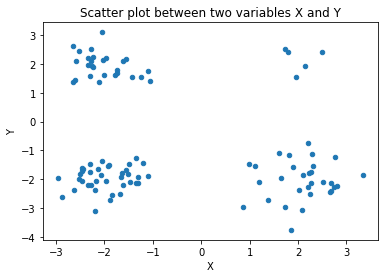

In [35]:
# Test data of shape (100,2)
rng = default_rng()
xs_cluster_test = np.zeros((100,2))
for i in range(0,100):
    if (random() < 0.3):
        xs_cluster_test[i] = rng.multivariate_normal((-2,2), np.multiply(0.2, np.identity(2)), size=None, check_valid='warn', tol=1e-8)
        continue
    elif random() < 0.5:
        xs_cluster_test[i] = rng.multivariate_normal((-2,-2), np.multiply(0.2, np.identity(2)), size=None, check_valid='warn', tol=1e-8)
        continue
    elif random() < 0.9:
        xs_cluster_test[i] = rng.multivariate_normal((2,-2), np.multiply(0.5, np.identity(2)), size=None, check_valid='warn', tol=1e-8)
        continue
    else:
        xs_cluster_test[i] = rng.multivariate_normal((2,2), np.multiply(0.5, np.identity(2)), size=None, check_valid='warn', tol=1e-8)

        
dataFrame = pd.DataFrame(data=xs_cluster_test, columns=['X','Y']);
dataFrame.plot.scatter(x='X', y='Y', title= "Scatter plot between two variables X and Y");
plot.show(block=True);

__Task B.3__ Run your $K$-Means algorithm on the test data for $K=2,3,4,5$ clusters and plot the final cluster centers.

In [29]:
# Use kmeans_plusplus(xs_cluster_test, K, random_state=0) for initialization

[[0.]
 [0.]]


## Radial Basis Function Network
__Task C.1__ Find $K=100$ cluster centers using $K$-Means.

In [ ]:
# This 100x21 numpy array should contain the cluster centers
# xs_centers = 

__Task C.2__ Implement the Gaussian basis functions and transform the data accordingly

In [ ]:
# xs_train_gauss = 

__Task C.3__ Run simple linear regression on the transformed data and evaluate it on the test set

In [ ]:
# This should contain the resulting predictions on the validation data set
# ys_pred_gauss_valid = 

# This should contain the corresponding SMSE
# smse_gauss = 

__Open task__ Can you improve the performance of the RBF network?

__Task C.4__ Evaluate your final model (either the one from Task C.3 or your improved model from the open task) on the test data

In [ ]:
# This should contain the predictions on the test data set
# ys_pred_test = 

# This should contain the resulting SMSE on the test data
# smse_test = 